#### ICE 6 Objectives
1. develop intuitions about principal component analysis
2. implement the PCA algorithm for dimension reduction purposes

## Principal Component Analysis (PCA)
<mark>Principal Component Analysis</mark> is a dimensionality reduction algorithm, which can also make it useful as a tool for visualization, noise filtering, feature selection, etc.

We'll start with a simple 2-dimension example with 200 random points that are roughly around *y = 1 + 2x*.

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

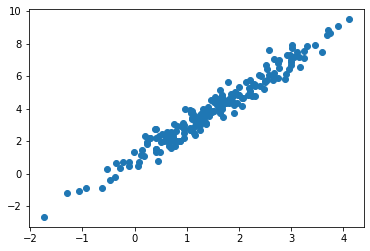

In [10]:
np.random.seed(123)

## Array of 200 values of x with means of 1 (by default) and sd of 1.5
X = np.random.randn(200) + 1.5

## Generate 200 residulas with sd of 0.6
res = 0.5 * np.random.randn(200)

y = 1 + 2 * X + res

twoDData = np.c_[X,y]

plt.scatter(twoDData[:, 0], twoDData[:, 1])

Rather than explain the relationship with a usual simple linear regression, we're now trying to use the algorithm to learn about the relationship betwen xs and ys (as opposed to teaching it to predict y values from x values). This is done by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [11]:
## Use Scikit-Learn's PCA estimator to compute:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(twoDData)

PCA(n_components=2)

In [12]:
## The fit learns some quantities from the data, most importantly...
print(pca.components_)

[[-0.43316568 -0.90131431]
 [-0.90131431  0.43316568]]


In [13]:
## and 
print(pca.explained_variance_)

[5.75175781 0.04167795]


From notes:

The two vectors in <mark>pca.components_</mark> represent the principal axes of the data: one pointing to the lower left (i.e., -0.43, -0.90) and explaining a lot more variance (5.75) and another orthorgnal to the first axis and explaining much less variance (0.04). The projection of each data point onto the principal axes are the "principal components" of the data. By comparing the variance_explained, we can conclude that the first component is more important than the second one.

We'll use this information to transform the original data, from data axes to principal axes. This is an <mark>affine transformation</mark>, which means it's composed of a translation, rotation, and uniform scaling.

It may seem like finding principal components is only good for mathematical curiosity, but it actually has very far-reaching applications for machine learning and data exploration.

For example, if the number of principal components is smaller than the original data dimensions, it can be used for dimension reduction.

In [14]:
pca = PCA(n_components=1)
pca.fit(twoDData)
twoDData_dr = pca.transform(twoDData)
print("original shape:   ", twoDData.shape)
print("transformed shape:", twoDData_dr.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


## PCA for Dimension Reduction
The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transformation of this reduced data and plot it along with the original data:

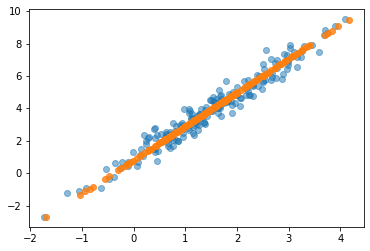

In [15]:
twoDData_new = pca.inverse_transform(twoDData_dr)
plt.scatter(twoDData[:, 0], twoDData[:, 1], alpha=0.5)
plt.scatter(twoDData_new[:, 0], twoDData_new[:, 1], alpha=0.8)

The blue points are the original data, while the organge points are the projected version. This shows us that <mark>a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance</mark>. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## PCA Example in an Intelligent Tutoring System
#### A Real World Example
Data from Assistments Intelligent Tutoring system, which gives students hints based on how they perform on math problems. Build a decision tree to help teachers decide which students to follow up with, based on students' performance in Assistments.

Variables are:
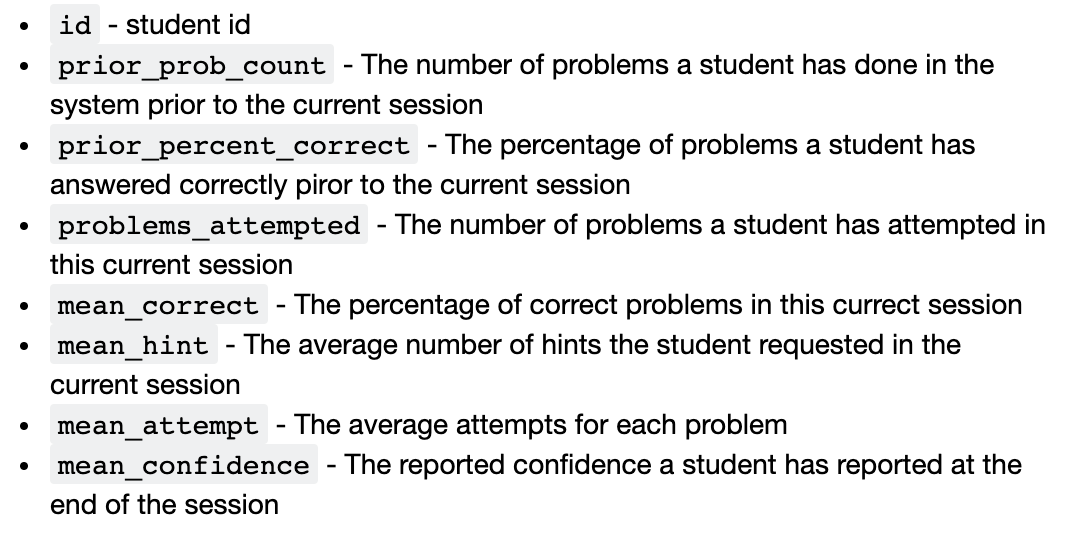

In [16]:
ICEdata = pd.read_csv("ICE6_Data.csv")
ICEdata

,id,prior_prob_count,prior_percent_correct,problems_attempted,mean_correct,mean_hint,mean_attempt,mean_confidence
0,172777,650,0.723077,4,1.000000,0.000000,1.000000,0.550159
1,175658,1159,0.800690,22,0.454545,2.227273,1.227273,0.437515
2,175669,1239,0.656981,11,0.636364,1.363636,1.727273,0.511060
3,176151,1246,0.729535,16,0.750000,0.562500,1.187500,0.491578
4,176165,1299,0.568129,6,0.333333,2.166667,2.000000,0.409887
...,...,...,...,...,...,...,...,...
337,253464,9,0.222222,23,0.782609,0.000000,1.347826,0.602103
338,253517,6,0.833333,16,0.562500,0.562500,2.062500,0.571269
339,255494,12,0.750000,3,0.666667,0.666667,1.333333,0.563379
340,256227,84,0.678571,3,0.333333,1.666667,1.333333,0.567501


In [17]:
ICEdata_noid = ICEdata.drop(['id'], axis = 1)
icepca = PCA(n_components=7)
icepca.fit(ICEdata_noid)

print("The principal components are:")
print(icepca.components_)
print("The explained variances are:")
print(icepca.explained_variance_)

The principal components are:
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are:
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


The explained variances show us that the first two components explain substantially more variances than other components, so let's reduce the data to two dimensions and plot it.

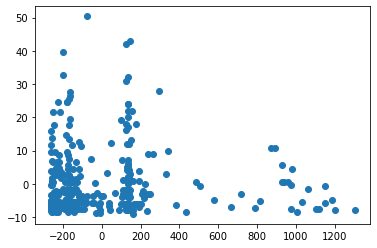

In [18]:
icedata_dr = icepca.transform(ICEdata_noid)
plt.scatter(icedata_dr[:,0], icedata_dr[:,1])

The scatterplot clearly shows 3 clusters. Try KMeans to pick them up

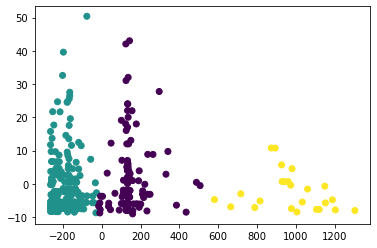

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(icedata_dr)
cluster_kmeans = kmeans.predict(icedata_dr)

#Use cluster_means as the indicator for clusters
plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1], c=cluster_kmeans, cmap='viridis')

#### What could the two dimensions mean? How would you interpret the KMeans clustering?

--> The two dimensions means there are two predictors that are most likely best for helping teachers predict which students to follow up with in their Assistments use.

[Read this link for clues](http://strata.uga.edu/8370/lecturenotes/principalComponents.html)

<mark>sklearn</mark> does not support an auto-generation of biplot for PCA, so it could be harder to interpret the dimensions. You may need to install <mark>pca</mark> to do it.

PCA result might be influenced by teh scale of each variable. So you can also try to scale the variables and run PCA again to compare the difference.

### Final Comments
Given any high-dimensional dataset, start with PCA in order to visualize the relationship between points and to understand the main variance in teh data. PCA won't be useful for every high-dimensional dataset, but it offers a straitforward and efficient path to gaining insight into high-d data.

PCA's main weakness is it's highly affected by outliers in the data. Many robust variants of PCA have been developed because of this, such as <mark>SparsePCA</mark> in <mark>sklearn</mark>.

In addition, PCA is based on the operationalization of distance, similar to KMeans, so it doesn't work very well with categorical variables. May be able to get away with dichotomous variables (and do one-hot encoding) and get good enough results. (not the best choice theoretically)